In [1]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
  

In [2]:
# Loading data 
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train) 
  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [3]:
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In the example shown above following steps are performed:

1. The k-nearest neighbor algorithm is imported from the scikit-learn package.
2. Create feature and target variables.
3. Split data into training and test data.
4. Generate a k-NN model using neighbors value.
5. Train or fit the data into the model.
6. Predict the future.

In [4]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 

In [5]:
# Loading data 
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [6]:
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 

0.9666666666666667



Model Accuracy:
So far so good. But how to decide the right k-value for the dataset? Obviously, we need to be familiar to data to get the range of expected k-value, but to get the exact k-value we need to test the model for each and every expected k-value. Refer to the example shown below.

In [8]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 
  
irisData = load_iris() 

In [9]:
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

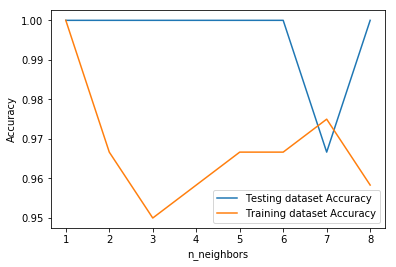

In [10]:
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [19]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]),2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance,trainingSet[x], length)
        distances.append((trainingSet[x],dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [20]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key = operator.itemgetter(1), reverse = True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [26]:

import random
import math
import operator

predictions = []
k = 3
for x in range(len(X_test)):
    neighbors = getNeighbors(X_train,X_test[x],k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('Predicted = ' + repr(result) + ', actual = ' + repr(X_test[x][-1]))
accuracy = getAccuracy(X_test,predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Predicted = 1.4, actual = 1.2
Predicted = 0.2, actual = 0.3
Predicted = 1.8, actual = 2.3
Predicted = 1.4, actual = 1.5
Predicted = 1.5, actual = 1.4
Predicted = 0.2, actual = 0.4
Predicted = 1.3, actual = 1.3
Predicted = 1.5, actual = 2.3
Predicted = 1.5, actual = 1.5
Predicted = 1.0, actual = 1.2
Predicted = 2.3, actual = 2.0
Predicted = 0.2, actual = 0.1
Predicted = 0.2, actual = 0.2
Predicted = 0.2, actual = 0.1
Predicted = 0.2, actual = 0.3
Predicted = 1.5, actual = 1.6
Predicted = 1.8, actual = 2.2
Predicted = 1.0, actual = 1.1
Predicted = 1.5, actual = 1.3
Predicted = 1.8, actual = 2.2
Predicted = 0.2, actual = 0.2
Predicted = 1.8, actual = 1.8
Predicted = 0.2, actual = 0.4
Predicted = 1.8, actual = 2.1
Predicted = 2.5, actual = 2.0
Predicted = 2.0, actual = 2.3
Predicted = 1.8, actual = 1.8
Predicted = 2.5, actual = 2.3
Predicted = 0.2, actual = 0.3
Predicted = 0.2, actual = 0.2
Accuracy: 23.333333333333332%
